In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr 
from scipy import stats

In [3]:
df = pd.read_csv("CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv")
df.head()

,station_id,stationname,date,daytype,rides
0,41280,Jefferson Park,12/22/2017,W,6104
1,41000,Cermak-Chinatown,12/18/2017,W,3636
2,40280,Central-Lake,12/02/2017,A,1270
3,40140,Dempster-Skokie,12/19/2017,W,1759
4,40690,Dempster,12/03/2017,U,499


In [4]:
df = df[df["stationname"] == "Clark/Lake"]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7822 entries, 35 to 1111667
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   station_id   7822 non-null   int64 
 1   stationname  7822 non-null   object
 2   date         7822 non-null   object
 3   daytype      7822 non-null   object
 4   rides        7822 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 366.7+ KB


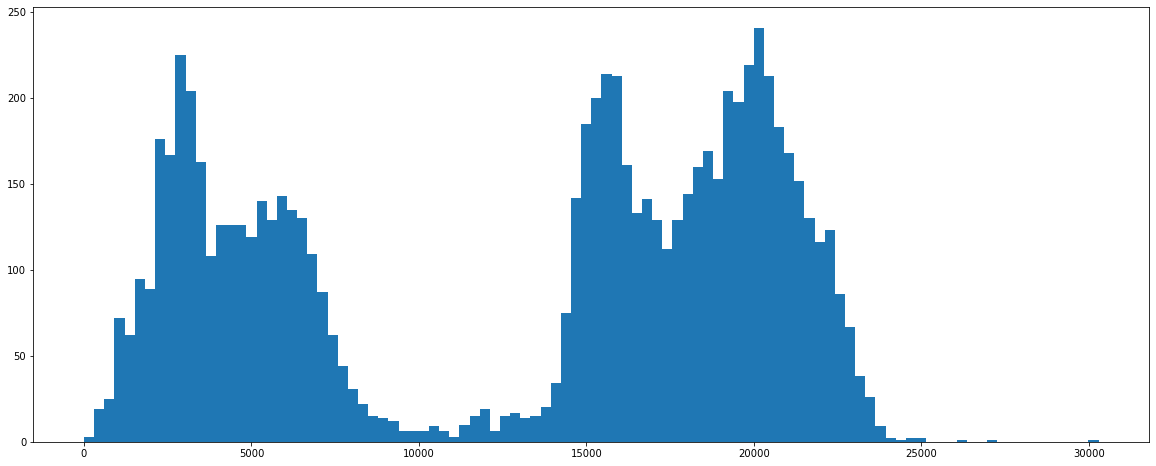

In [6]:
plt.figure(figsize=(20,8))
plt.hist(df["rides"], bins=100)
plt.show()

<AxesSubplot:xlabel='rides'>

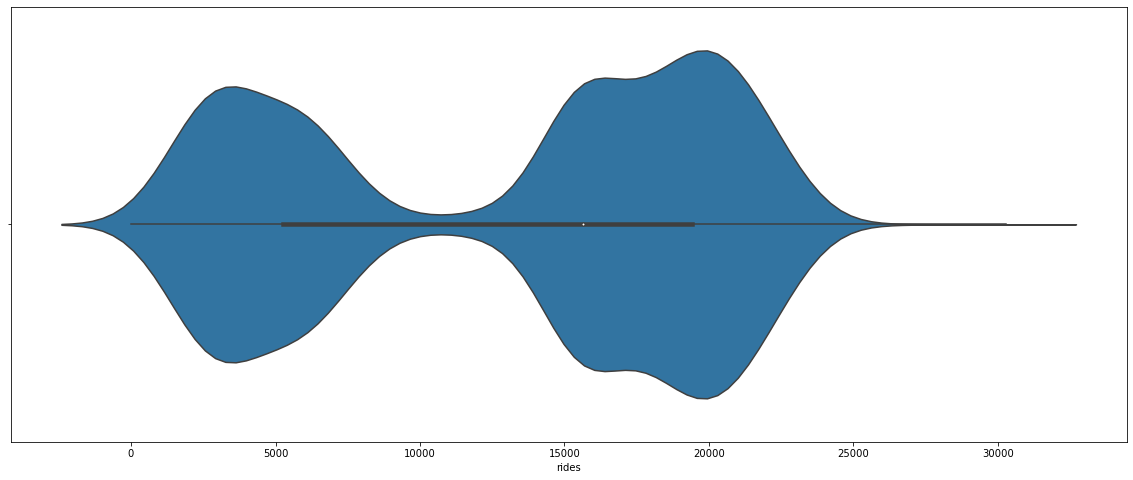

In [7]:
plt.figure(figsize=(20,8))
sns.violinplot(x= df["rides"])

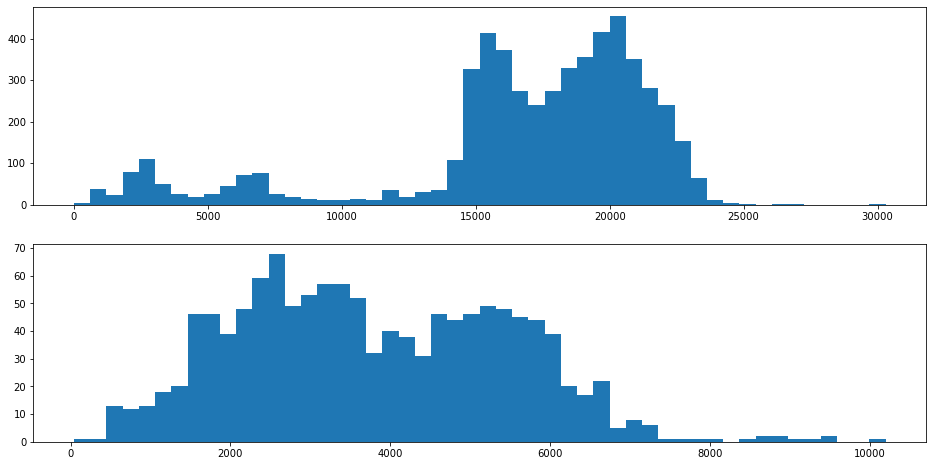

In [8]:
subs, fig = plt.subplots(2,1, figsize=(16,8))
fig[0].hist(df[df["daytype"]=="W"]["rides"], bins=50)
fig[1].hist(df[df["daytype"]=="U"]["rides"], bins=50)
plt.show()

In [9]:
df["date"] = pd.to_datetime(df["date"])
df.head()

,station_id,stationname,date,daytype,rides
35,40380,Clark/Lake,2017-12-20,W,20358
313,40380,Clark/Lake,2017-12-10,U,4973
337,40380,Clark/Lake,2017-12-03,U,5682
374,40380,Clark/Lake,2017-12-22,W,15598
635,40380,Clark/Lake,2017-12-21,W,19322


In [10]:
df.sort_values(by="date", inplace=True)
df.head()

,station_id,stationname,date,daytype,rides
937922,40380,Clark/Lake,2001-01-01,U,1080
980971,40380,Clark/Lake,2001-01-02,W,13263
923570,40380,Clark/Lake,2001-01-03,W,14416
425169,40380,Clark/Lake,2001-01-04,W,15118
409094,40380,Clark/Lake,2001-01-05,W,14980


In [11]:
df["day_lag"] = df["rides"].shift(-14)


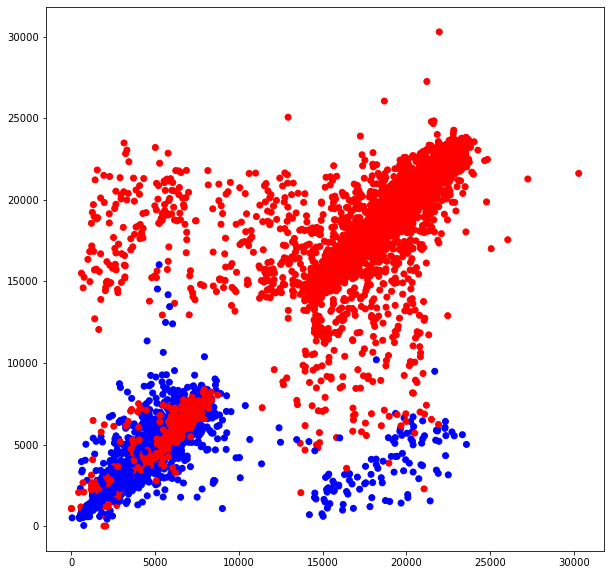

In [12]:
plt.figure(figsize=(10,10))
colors = {"W":"red", "U":"blue", "A":"blue"}
plt.scatter(df["day_lag"], df["rides"], c = df["daytype"].apply(lambda x: colors[x]))
plt.show()

In [13]:
df["day_month"] = df["date"].apply(lambda x: "-".join([str(x.day), str(x.month)]))
df["year"] = df["date"].apply(lambda x: x.year)
df.head()

,station_id,stationname,date,daytype,rides,day_lag,day_month,year
937922,40380,Clark/Lake,2001-01-01,U,1080,9017.0,1-1,2001
980971,40380,Clark/Lake,2001-01-02,W,13263,16003.0,2-1,2001
923570,40380,Clark/Lake,2001-01-03,W,14416,15805.0,3-1,2001
425169,40380,Clark/Lake,2001-01-04,W,15118,15526.0,4-1,2001
409094,40380,Clark/Lake,2001-01-05,W,14980,15512.0,5-1,2001


In [14]:
df_weakdays = df[df["daytype"]=="W"]
df_weakdays = df_weakdays[df_weakdays["year"] <2017]
df_weakdays["day_number"] = df_weakdays["date"].apply(lambda x: x.day+x.month*30)
df_weakdays.sort_values(by="day_number", inplace=True)

<AxesSubplot:xlabel='year', ylabel='day_month'>

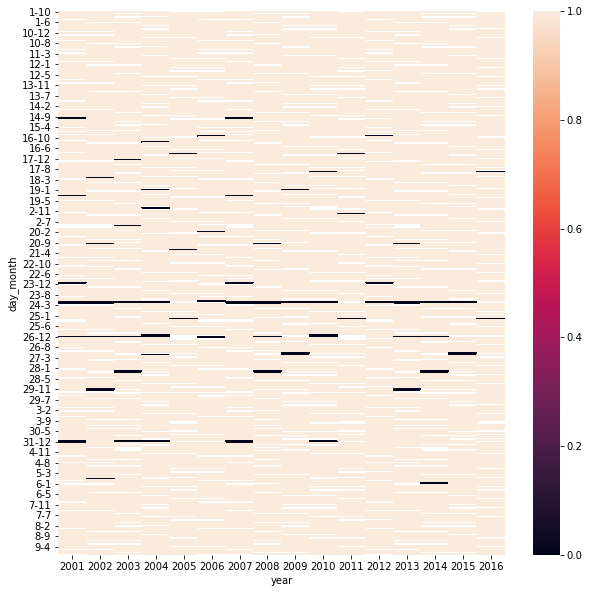

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df_weakdays.groupby(["day_month", "year"])["rides"].apply(lambda x: 1 if x.mean()>10000 else 0).unstack())

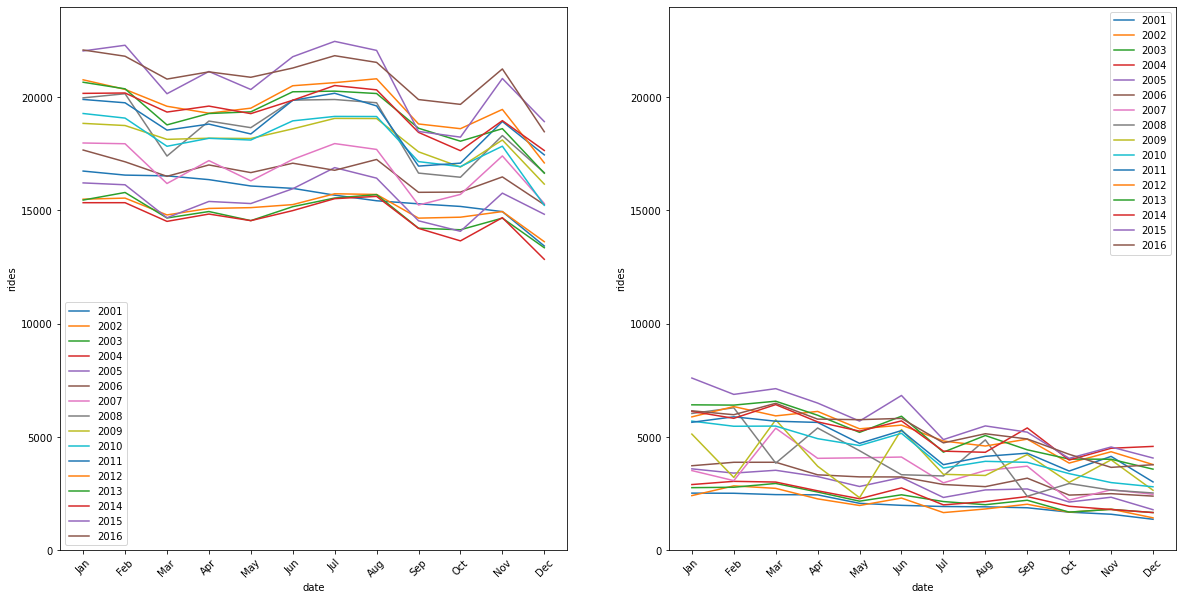

In [16]:
import warnings
warnings.filterwarnings("ignore")
fig, axis = plt.subplots(1,2, figsize=(20,10))
plt.xticks(rotation=45)

for i in range(2001,2017):
    rides = df[(df["year"]==i) & (df["daytype"] == "W")].groupby(df["date"].apply(lambda x: x.strftime("%m"))).mean()["rides"].sort_values(ascending=False)
    sns.lineplot(rides.index, rides, ax=axis[0], label=i, sort=True)
axis[0].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
axis[0].set_ylim(0,24000)
for i in range(2001,2017):
    rides = df[(df["year"]==i) & (df["daytype"] == "U")].groupby(df["date"].apply(lambda x: x.strftime("%m"))).mean()["rides"].sort_values(ascending=False)
    sns.lineplot(rides.index, rides, ax=axis[1], label=i, sort=True)
axis[1].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
axis[1].set_ylim(0,24000)
plt.show()

In [17]:
df["date"].apply(lambda x: x.month_name())

937922     January
980971     January
923570     January
425169     January
409094     January
            ...   
1111663        May
1111664        May
1111665        May
1111666        May
1111667        May
Name: date, Length: 7822, dtype: object

In [18]:
rides = df[(df["year"]==i) & (df["daytype"] == "W")].groupby(df["date"].apply(lambda x: x.strftime("%m"))).mean()["rides"]


In [19]:
print(rides)

date
01    19680.700000
02    19893.476190
03    20797.478261
04    20877.619048
05    21115.619048
06    22081.818182
07    21806.150000
08    21285.173913
09    21534.285714
10    21829.857143
11    21245.000000
12    18473.238095
Name: rides, dtype: float64


In [20]:
df = pyreadr.read_r("okc.RData")
df.keys()

odict_keys(['okc_test', 'okc_train', 'okc_down', 'okc_sampled'])

In [21]:
df_okc = df["okc_train"] 

In [22]:
df_okc.columns

Index(['age', 'diet', 'drinks', 'drugs', 'education', 'height', 'income',
       'last_online', 'offspring', 'pets', 'religion', 'sign', 'smokes',
       'status', 'where_state', 'where_town', 'religion_modifer',
       'sign_modifer', 'cpp', 'cpp_fluently', 'cpp_okay', 'cpp_poorly', 'lisp',
       'lisp_fluently', 'lisp_okay', 'lisp_poorly', 'asian', 'black',
       'hispanic_latin', 'indian', 'middle_eastern', 'native_american',
       'other', 'pacific_islander', 'white', 'essay_length', 'Class',
       'profile'],
      dtype='object')

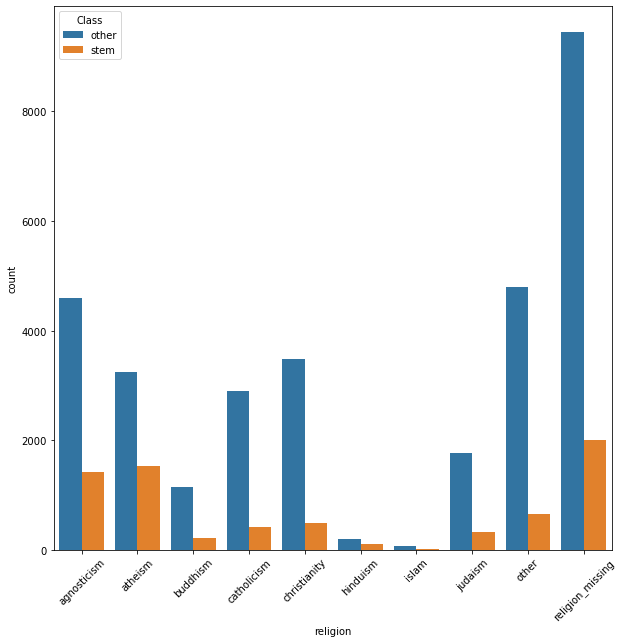

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(x="religion", data=df_okc, hue = "Class")
plt.xticks(rotation=45)
plt.show()

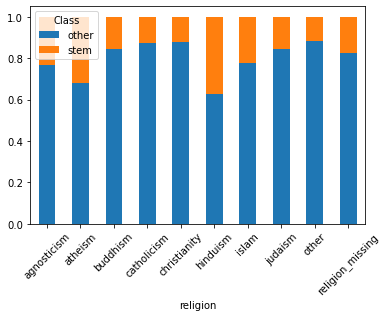

In [24]:
df_grb = df_okc.groupby(["religion", "Class"]).size().reset_index().pivot(index="religion", columns="Class", values=0)  
# scale all values to between 0 and 1
df_grb_sum = df_grb.div(df_grb.sum(axis=1), axis=0) 
df_grb_sum.plot(kind="bar", stacked = True)
plt.xticks(rotation=45)
plt.show()

In [25]:
def get_conf_int(p, z, n):
    return p - z * np.sqrt(p * (1 - p) / n), p + z * np.sqrt(p * (1 - p) / n)

conf_intervals = {}
for i in df_grb.index:
    p = df_grb_sum["stem"].loc[i]
    z = 1.96
    #calculate the confidence interval
    conf_intervals[i] = get_conf_int(p, z, dict(df_okc["religion"].value_counts())[i])
    

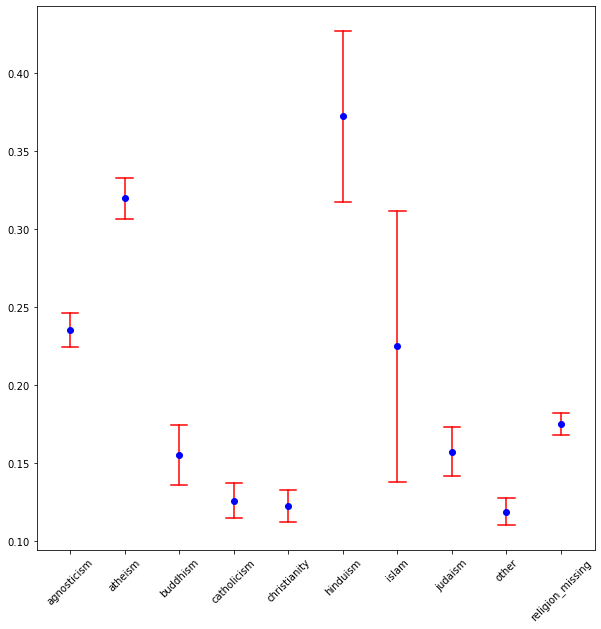

In [26]:
def plot_confidence_interval(conf_intervals):
    tick = 1 
    for k, v in conf_intervals.items():
        lower, upper = v
        plt.plot([tick,tick], [lower, upper], color="red")
        plt.plot(tick, (lower+upper)/2, "o", color="blue")
        plt.plot([tick-0.15, tick+0.15], [lower, lower], color="red")
        plt.plot([tick-0.15, tick+0.15], [upper, upper], color="red")
        tick += 1
    plt.xticks(list(range(1, tick)), conf_intervals.keys(), rotation=45)
    plt.show()
plt.figure(figsize=(10,10))
plot_confidence_interval(conf_intervals)

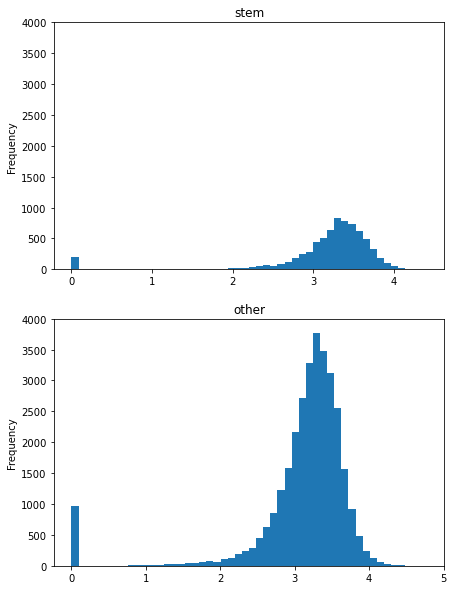

In [27]:
fig, axis = plt.subplots(2,1, figsize=(7,10))
df_okc[df_okc["Class"] == "stem"]["essay_length"].plot(kind="hist", bins=50, ax=axis[0], title="stem")
df_okc[df_okc["Class"] == "other"]["essay_length"].plot(kind="hist", bins=50, ax=axis[1], title= "other")
axis[0].set_ylim(0,4000)
axis[1].set_ylim(0,4000)
plt.show()


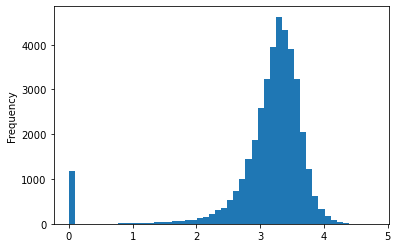

In [28]:
df_okc["essay_length"].plot(kind="hist", bins=50)
plt.show()


(array([0, 1, 2, 3]),
 [Text(0, 0, 'drugs_missing'),
  Text(1, 0, 'never'),
  Text(2, 0, 'often'),
  Text(3, 0, 'sometimes')])

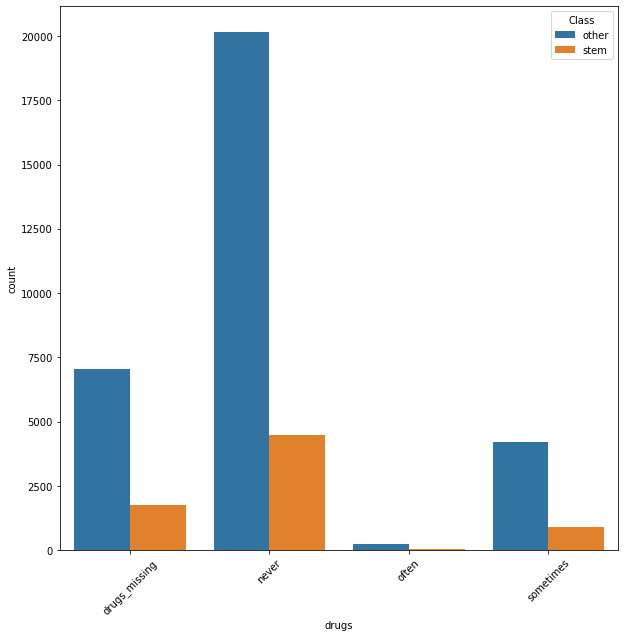

In [29]:
# visualize the relationship between drug use and class 
plt.figure(figsize=(10,10))
sns.countplot(x="drugs", data=df_okc, hue = "Class")
plt.xticks(rotation=45)